<a href="https://colab.research.google.com/github/SNMHZ/DART_8TH/blob/master/%ED%94%8C%EC%A0%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리, 데이터 로드

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
data_d = pd.read_excel("https://github.com/SNMHZ/DART_8TH/raw/master/project/data/%ED%94%8C%EC%A0%9D1.xlsx", sheet_name="data_d", index_col=0)
data_m = pd.read_excel("https://github.com/SNMHZ/DART_8TH/raw/master/project/data/%ED%94%8C%EC%A0%9D1.xlsx", sheet_name="data_m", index_col=0)
kospi_d = pd.read_excel("https://github.com/SNMHZ/DART_8TH/raw/master/project/data/%ED%94%8C%EC%A0%9D1.xlsx", sheet_name="kospi_d", index_col=0)
kospi_m = pd.read_excel("https://github.com/SNMHZ/DART_8TH/raw/master/project/data/%ED%94%8C%EC%A0%9D1.xlsx", sheet_name="kospi_m", index_col=0)

In [5]:
data_d

,"M2(광의통화,말잔)",국고채권(3년),국고채권(10년),"국내총생산(시장가격, GDP)","국내총생산(시장가격, GDP).1",WTI유(NYMEX),원/달러(종가),수출총액,무역수지,총지수,[단절] 미국,OECD - 전체,한국,OECD 합계,한국.1,한국.2
D A T E,,,,,,,,,,,,,,,,
2000-01-04,NaN,9.040,NaN,NaN,NaN,25.53,1122.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,9.110,NaN,NaN,NaN,25.20,1135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,9.160,NaN,NaN,NaN,24.79,1146.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,9.170,NaN,NaN,NaN,24.20,1138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,9.230,NaN,NaN,NaN,24.71,1133.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,NaN,1.136,2.134,NaN,NaN,64.92,1113.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-11,NaN,1.128,2.139,NaN,NaN,65.28,1119.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-12,NaN,1.121,2.125,NaN,NaN,66.08,1124.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 코스피 사후 3 수익률

In [9]:
kospi_m['코스피_사후3']=kospi_m['코스피'].shift(-3)

In [13]:
kospi_m['코스피_사후3_수익률']=(kospi_m['코스피_사후3']-kospi_m['코스피'])/kospi_m['코스피']*100

In [14]:
kospi_m

,코스피,코스피_사후3,코스피_사후3_수익률
D A T E,,,
2000-01-31,943.88,725.39,-23.148070
2000-02-29,828.38,731.88,-11.649243
2000-03-31,860.94,821.22,-4.613562
2000-04-28,725.39,705.97,-2.677181
2000-05-31,731.88,688.62,-5.910805
...,...,...,...
2020-12-31,2873.47,3061.42,6.540872
2021-01-29,2976.21,3147.86,5.767402
2021-02-26,3012.95,NaN,NaN


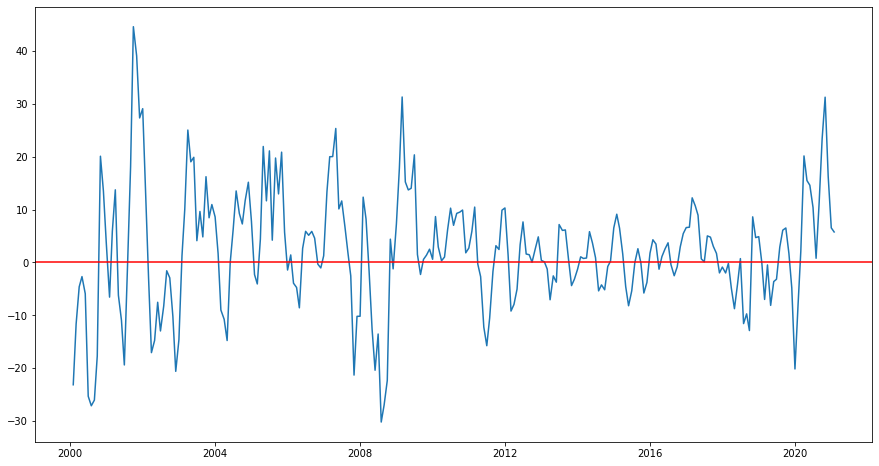

In [18]:
plt.figure(figsize = (15,8))
plt.plot(kospi_m['코스피_사후3_수익률'])
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# 원달러 환율

In [20]:
cur = pd.DataFrame()
cur['원달러'] = data_m['원/달러(종가)']

In [21]:
cur

,원달러
D A T E,
2000-01-31,1123.2
2000-02-29,1131.0
2000-03-31,1106.0
2000-04-28,1109.1
2000-05-31,1129.4
...,...
2020-12-31,1086.3
2021-01-29,1118.8
2021-02-26,1123.5


In [26]:
#z-score 정규화. 불필요
X = np.array(cur['원달러']).reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
cur['원달러_zscore'] = X_scaled.reshape(1,-1)[0]

In [27]:
cur['원달러_zscore']

D A T E
2000-01-31   -0.044704
2000-02-29    0.032143
2000-03-31   -0.214160
2000-04-28   -0.183619
2000-05-31    0.016379
                ...   
2020-12-31   -0.408247
2021-01-29   -0.088053
2021-02-26   -0.041748
2021-03-31    0.040024
2021-04-30   -0.152092
Name: 원달러_zscore, Length: 256, dtype: float64

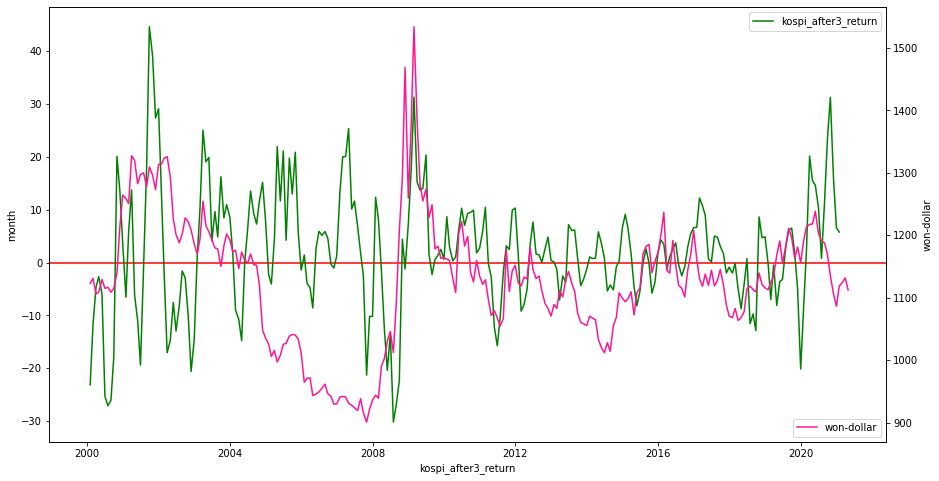

In [35]:
fig, ax1 = plt.subplots(figsize = (15,8))
plt.axhline(y=0, color='r', linestyle='-')
ax1.set_xlabel('kospi_after3_return')
ax1.set_ylabel('month')
ax1.plot(kospi_m['코스피_사후3_수익률'].index, kospi_m['코스피_사후3_수익률'].values, color='green', label='kospi_after3_return')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('won-dollar')
ax2.plot(cur['원달러'].index, cur['원달러'].values, color='deeppink', label='won-dollar')
ax2.legend(loc='lower right')

plt.show()

In [36]:
cur['코스피_사후3_수익률'] = kospi_m['코스피_사후3_수익률']

In [44]:
cur_dorp = cur.dropna()

In [45]:
cur_dorp.corr(method='pearson')

,원달러,코스피_사후3_수익률
원달러,1.000000,0.172469
코스피_사후3_수익률,0.172469,1.000000


# wti

In [52]:
cur = pd.DataFrame()
cur['코스피_사후3_수익률'] = kospi_m['코스피_사후3_수익률']
cur['원달러'] = data_m['원/달러(종가)']
cur['WTI유(NYMEX)'] = data_m['WTI유(NYMEX)']

In [54]:
cur.corr()

,코스피_사후3_수익률,원달러,WTI유(NYMEX)
코스피_사후3_수익률,1.000000,0.172469,-0.225720
원달러,0.172469,1.000000,-0.496458
WTI유(NYMEX),-0.225720,-0.496458,1.000000


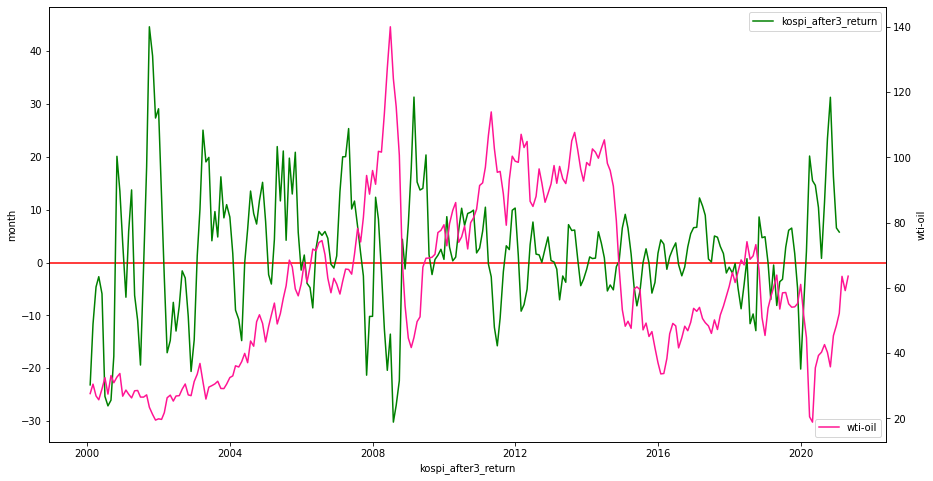

In [49]:
fig, ax1 = plt.subplots(figsize = (15,8))
plt.axhline(y=0, color='r', linestyle='-')
ax1.set_xlabel('kospi_after3_return')
ax1.set_ylabel('month')
ax1.plot(kospi_m['코스피_사후3_수익률'].index, kospi_m['코스피_사후3_수익률'].values, color='green', label='kospi_after3_return')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('wti-oil')
ax2.plot(data_m['WTI유(NYMEX)'].index, data_m['WTI유(NYMEX)'].values, color='deeppink', label='wti-oil')
ax2.legend(loc='lower right')

plt.show()

# M2

In [58]:
m2 = pd.DataFrame()
m2['m2'] = data_m['M2(광의통화,말잔)']

In [60]:
m2['m2_shift1'] = data_m['M2(광의통화,말잔)'].shift(-1)

In [62]:
m2['m2_사후1_변화율']=(m2['m2_shift1']-m2['m2'])/m2['m2']*100

In [63]:
m2

,m2,m2_shift1,m2_사후1_변화율
D A T E,,,
2000-01-31,676895.4,679807.1,0.430155
2000-02-29,679807.1,684735.3,0.724941
2000-03-31,684735.3,692399.0,1.119221
2000-04-28,692399.0,687687.3,-0.680489
2000-05-31,687687.3,683704.8,-0.579115
...,...,...,...
2020-12-31,3199835.7,3232213.3,1.011852
2021-01-29,3232213.3,3289214.2,1.763525
2021-02-26,3289214.2,3324920.8,1.085566


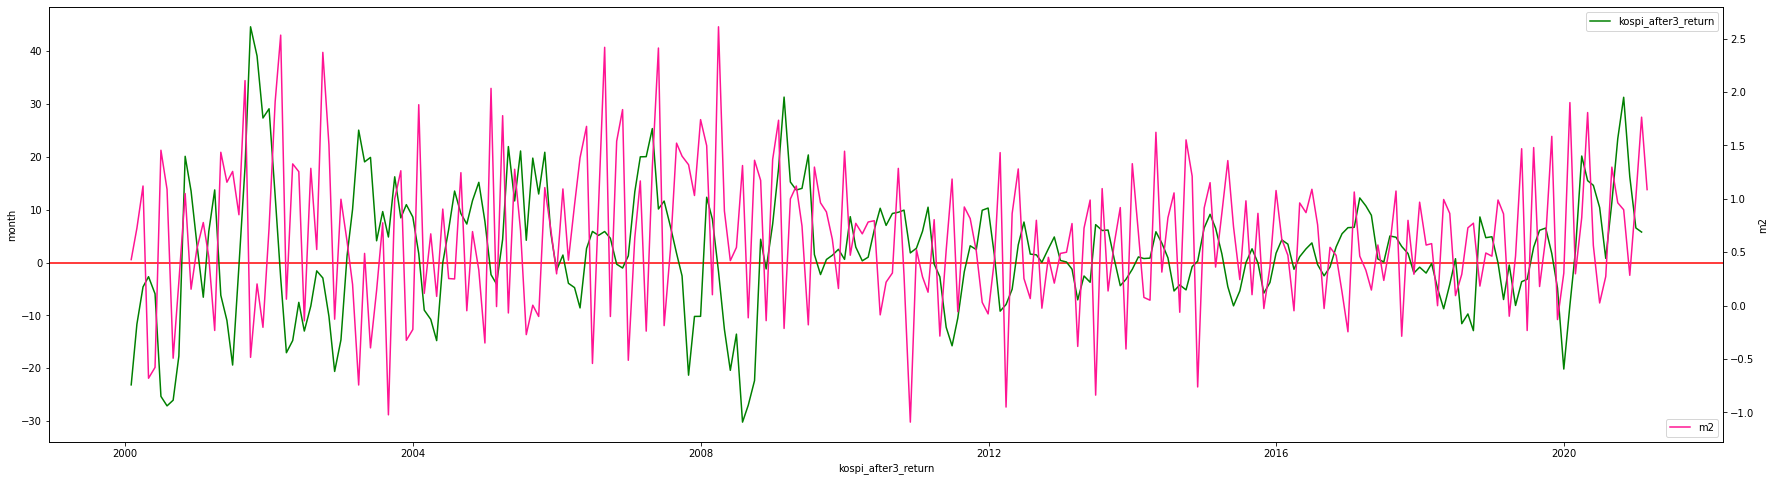

In [70]:
fig, ax1 = plt.subplots(figsize = (30,8))
plt.axhline(y=0, color='r', linestyle='-')
ax1.set_xlabel('kospi_after3_return')
ax1.set_ylabel('month')
ax1.plot(kospi_m['코스피_사후3_수익률'].index, kospi_m['코스피_사후3_수익률'].values, color='green', label='kospi_after3_return')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('m2')
ax2.plot(m2['m2_사후1_변화율'].index, m2['m2_사후1_변화율'].values, color='deeppink', label='m2')
ax2.legend(loc='lower right')

plt.show()

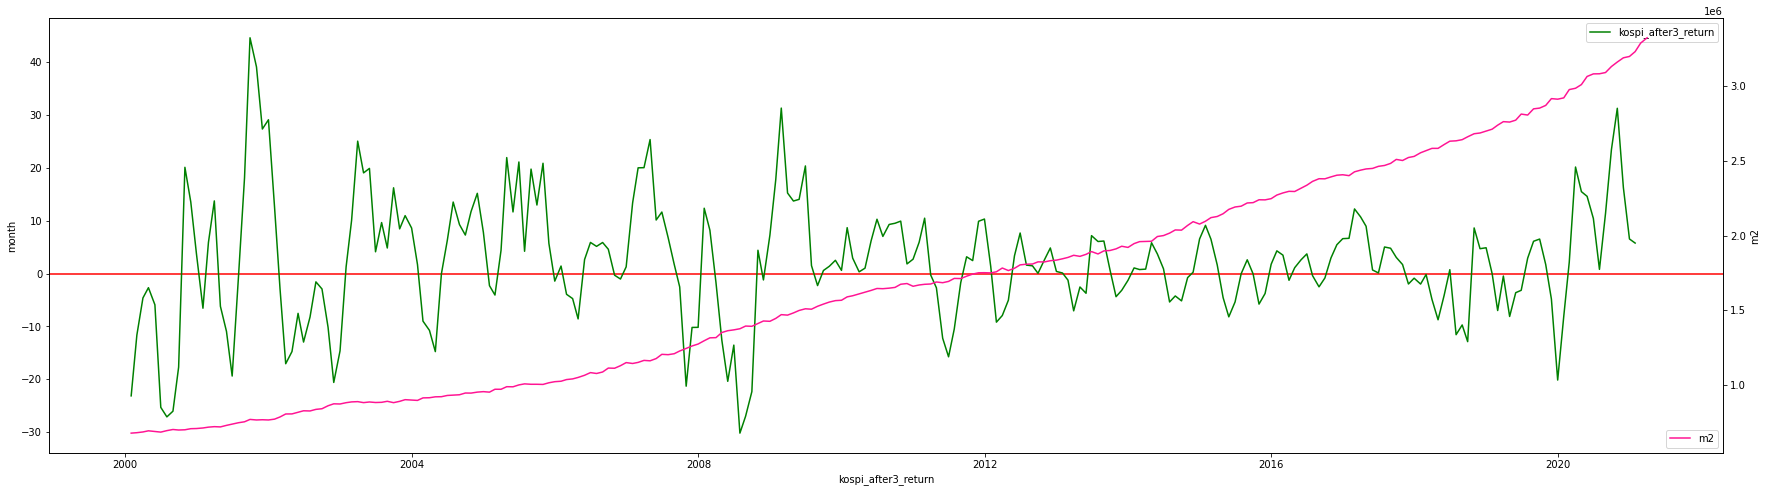

In [71]:
fig, ax1 = plt.subplots(figsize = (30,8))
plt.axhline(y=0, color='r', linestyle='-')
ax1.set_xlabel('kospi_after3_return')
ax1.set_ylabel('month')
ax1.plot(kospi_m['코스피_사후3_수익률'].index, kospi_m['코스피_사후3_수익률'].values, color='green', label='kospi_after3_return')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('m2')
ax2.plot(m2['m2'].index, m2['m2'].values, color='deeppink', label='m2')
ax2.legend(loc='lower right')

plt.show()